In [10]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import mplhep as hep

from coffea.nanoevents import NanoEventsFactory, BaseSchema
import awkward as ak

plt.style.use(hep.style.CMS)
plt.clf()
plt.close("all")

# ordered as [edgecolor, facecolor]
mainblue = ["#42719f", "#6ab4ff"]
coralgreen = ["#117a65", "#138D75"]
reddish = ["#c82929", "#e42f2f"]
orangish = ["#d78939", "#e48a2f"]
blueish = ["#4387cb", "#2f89e4"]

plt.rcParams["font.family"] = "Helvetica Neue"

In [11]:
from matplotlib import font_manager

print("List of all fonts currently available in the matplotlib:")
print(*font_manager.findSystemFonts(fontpaths=None, fontext='ttf'), sep="\n")

List of all fonts currently available in the matplotlib:
/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf
/System/Library/Fonts/Supplemental/NotoSansTagbanwa-Regular.ttf
/System/Library/Fonts/Supplemental/Trebuchet MS Bold.ttf
/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf
/System/Library/Fonts/Supplemental/Tamil MN.ttc
/System/Library/Fonts/Supplemental/Gurmukhi Sangam MN.ttc
/Library/Fonts/ESSTIX14.TTF
/usr/X11R6/lib/X11/fonts/TTF/VeraBd.ttf
/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf
/System/Library/Fonts/Supplemental/NotoSansSundanese-Regular.ttf
/System/Library/Fonts/Times.ttc
/System/Library/Fonts/Supplemental/AmericanTypewriter.ttc
/System/Library/Fonts/Supplemental/Tahoma.ttf
/System/Library/Fonts/SFCompactItalic.ttf
/System/Library/Fonts/Symbol.ttf
/System/Library/Fonts/Supplemental/Zapfino.ttf
/System/Library/Fonts/Supplemental/PartyLET-plain.ttf
/Library/Fonts/DejaVuSerifCondensed.ttf
/System/Library/Fonts/Supplemental/Al Nile.t

## Load friend TTrees of the 3-fold model

In [12]:
train_region = 'SB'

# load files
threeTag = NanoEventsFactory.from_root(f'trained_on_{train_region}/threeTag_SvB_trained_on_{train_region}.root', schemaclass = BaseSchema, treepath = 'Events').events()
fourTag = NanoEventsFactory.from_root(f'trained_on_{train_region}/fourTag_10x_SvB_trained_on_{train_region}.root', schemaclass = BaseSchema, treepath = 'Events').events()
HH4b = NanoEventsFactory.from_root(f'trained_on_{train_region}/HH4b_SvB_trained_on_{train_region}.root', schemaclass = BaseSchema, treepath = 'Events').events()

## ThreeTag sample

In [13]:
SR = (threeTag.SvB_SR == True)
SB = (threeTag.SvB_SB == True)

In [14]:
# scores in SR
SR_signal_score = threeTag.SvB_S[SR]
SR_background_score = threeTag.SvB_BG[SR]

# scores in SB
SB_signal_score = threeTag.SvB_S[SB]
SB_background_score = threeTag.SvB_BG[SB]

### SvB score in SR

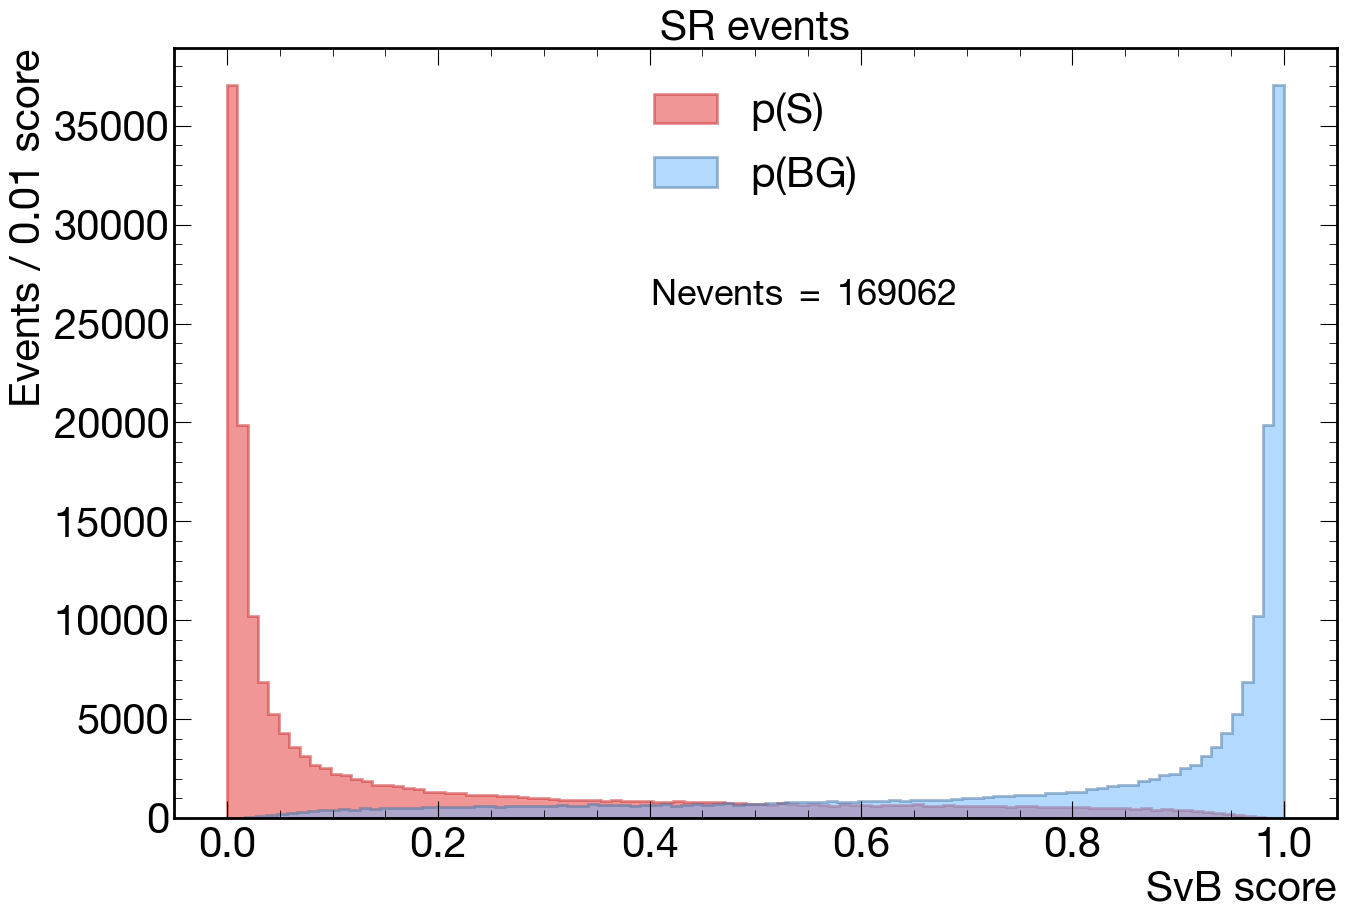

In [15]:
_min = 0.
_max = 1.
width = .01 # GeV
nbins = int(round((_max - _min) / width)) + 1


fig, ax = plt.subplots(figsize=(15, 10))
h, bins, _ = ax.hist(
    SR_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = reddish[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(S)$"
)
ax.hist(
    SR_background_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(BG)$"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("SvB score", fontsize = 30)
ax.set_ylabel("Events / %.2f score" % width, fontsize = 30)
ax.text((_max + _min) / 2 - .2 * (_max + _min) / 2, .70 * max(h), "Nevents $=$ %s" % len(SR_signal_score))
#ax.set_ylim(0, 5)
ax.legend(loc = "upper center", fontsize = 30)
ax.set_title("SR events", fontsize = 30)
plt.savefig("plots/threeTag_SvB_SR.pdf")

### SvB score in SB

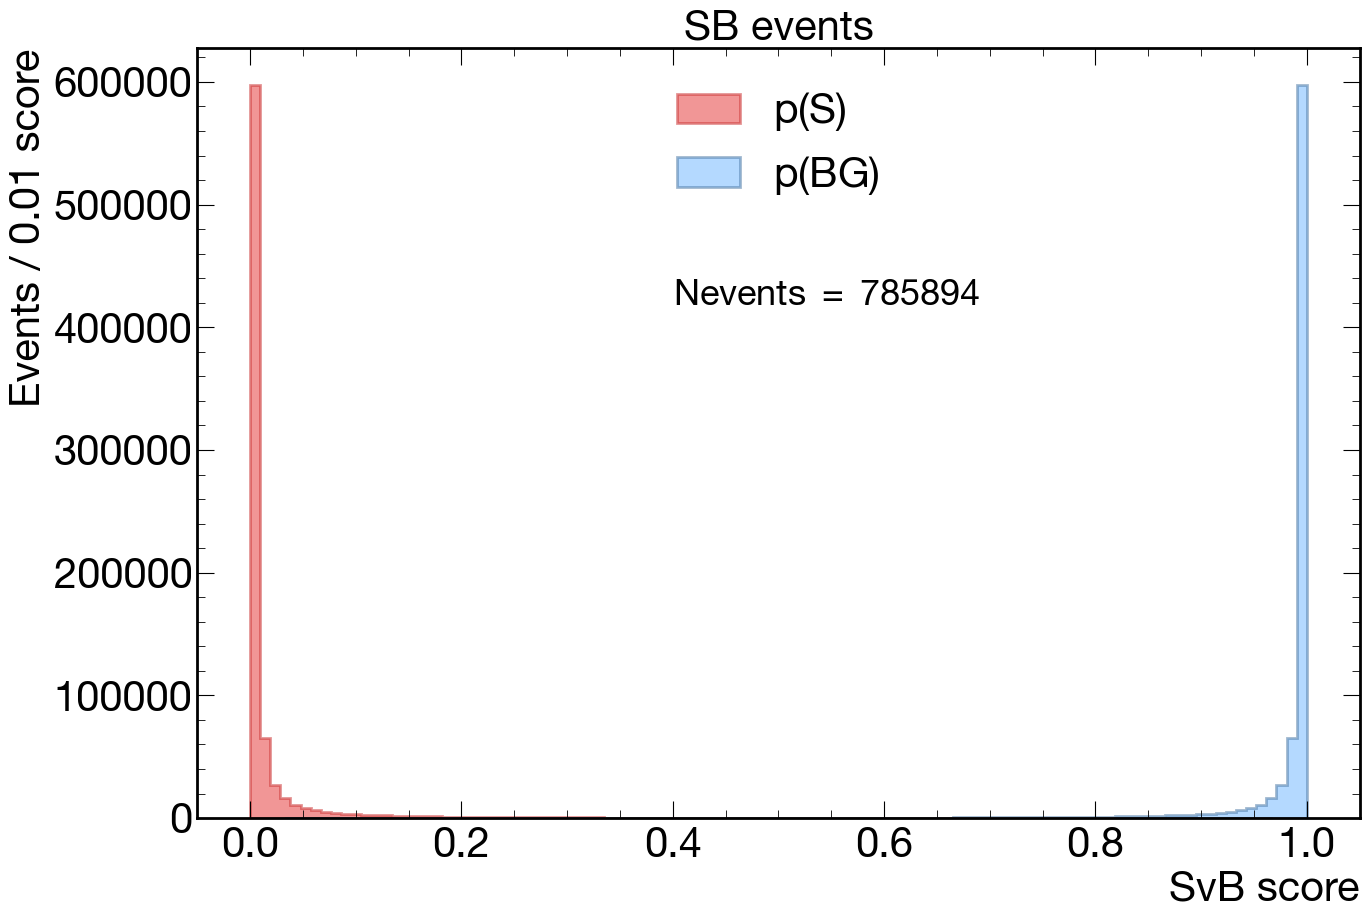

In [16]:
_min = 0.
_max = 1.
width = .01 # GeV
nbins = int(round((_max - _min) / width)) + 1


fig, ax = plt.subplots(figsize=(15, 10))
h, bins, _ = ax.hist(
    SB_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = reddish[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(S)$"
)
ax.hist(
    SB_background_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(BG)$"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("SvB score", fontsize = 30)
ax.set_ylabel("Events / %.2f score" % width, fontsize = 30)
ax.text((_max + _min) / 2 - .2 * (_max + _min) / 2, .70 * max(h), "Nevents $=$ %s" % len(SB_signal_score))
#ax.set_ylim(0, 5)
ax.legend(loc = "upper center", fontsize = 30)
ax.set_title("SB events", fontsize = 30)
plt.savefig("plots/SvB_SB.pdf")

## FourTag sample

In [17]:
SR = (fourTag.SvB_SR == True)
SB = (fourTag.SvB_SB == True)

In [18]:
# scores in SR
SR_signal_score = fourTag.SvB_S[SR]
SR_background_score = fourTag.SvB_BG[SR]

# scores in SB
SB_signal_score = fourTag.SvB_S[SB]
SB_background_score = fourTag.SvB_BG[SB]

### SvB score in SR

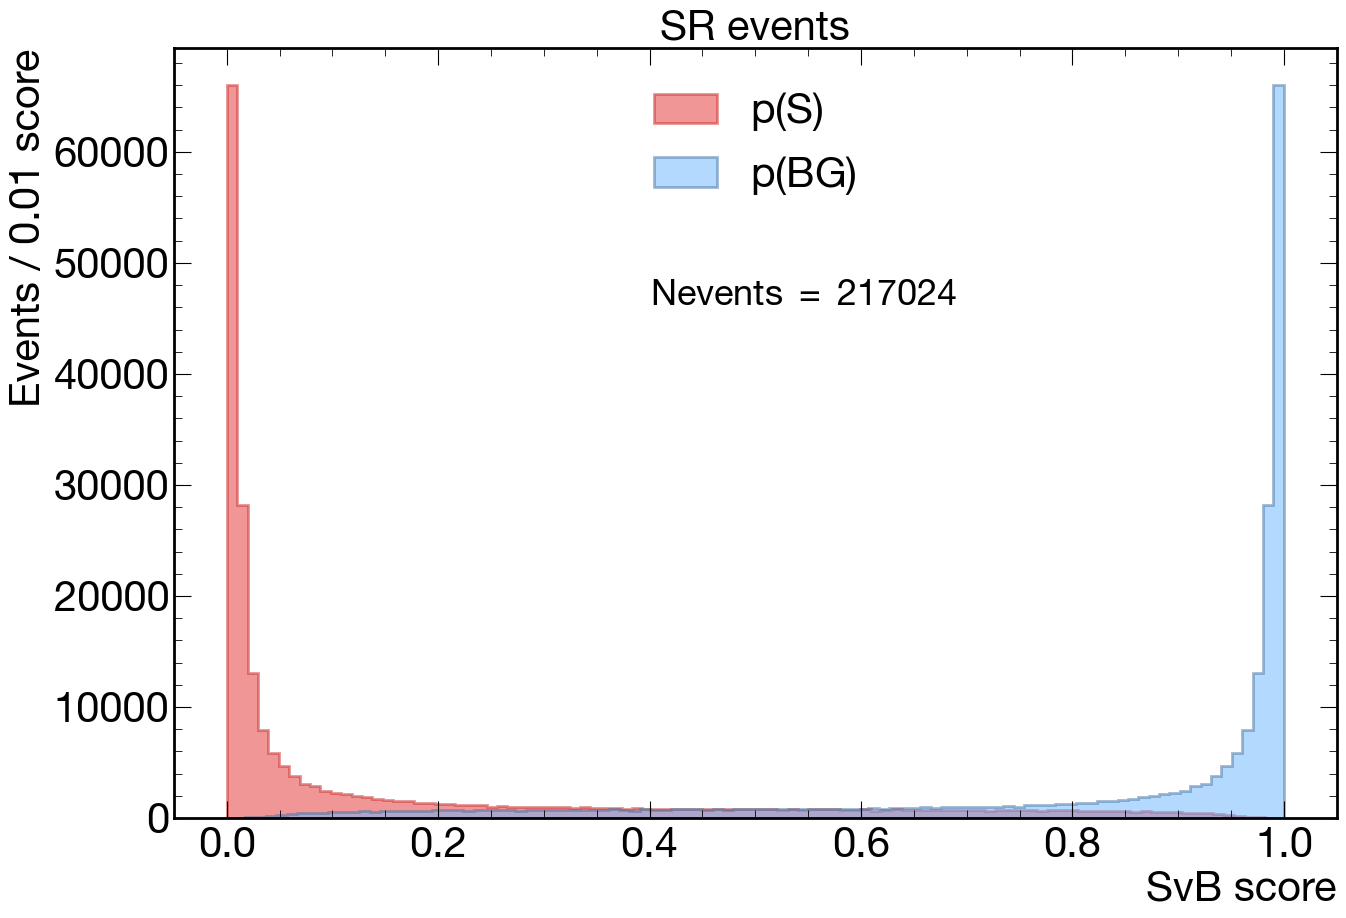

In [19]:
_min = 0.
_max = 1.
width = .01 # GeV
nbins = int(round((_max - _min) / width)) + 1


fig, ax = plt.subplots(figsize=(15, 10))
h, bins, _ = ax.hist(
    SR_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = reddish[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(S)$"
)
ax.hist(
    SR_background_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(BG)$"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("SvB score", fontsize = 30)
ax.set_ylabel("Events / %.2f score" % width, fontsize = 30)
ax.text((_max + _min) / 2 - .2 * (_max + _min) / 2, .70 * max(h), "Nevents $=$ %s" % len(SR_signal_score))
#ax.set_ylim(0, 5)
ax.legend(loc = "upper center", fontsize = 30)
ax.set_title("SR events", fontsize = 30)
plt.savefig("plots/fourTag_SvB_SR.pdf")

### SvB score in SB

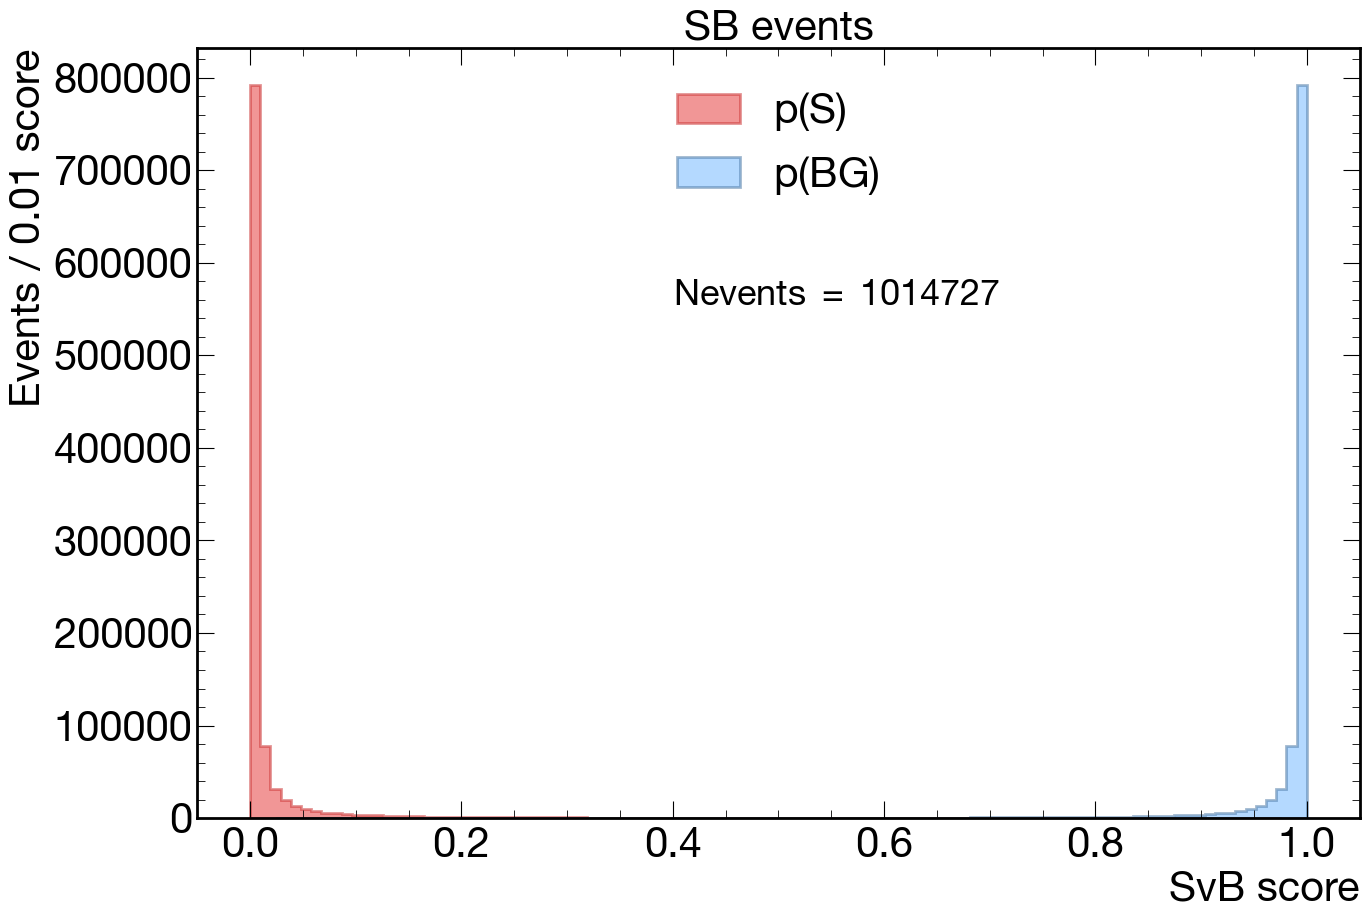

In [20]:
_min = 0.
_max = 1.
width = .01 # GeV
nbins = int(round((_max - _min) / width)) + 1


fig, ax = plt.subplots(figsize=(15, 10))
h, bins, _ = ax.hist(
    SB_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = reddish[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(S)$"
)
ax.hist(
    SB_background_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(BG)$"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("SvB score", fontsize = 30)
ax.set_ylabel("Events / %.2f score" % width, fontsize = 30)
ax.text((_max + _min) / 2 - .2 * (_max + _min) / 2, .70 * max(h), "Nevents $=$ %s" % len(SB_signal_score))
#ax.set_ylim(0, 5)
ax.legend(loc = "upper center", fontsize = 30)
ax.set_title("SB events", fontsize = 30)
plt.savefig("plots/SvB_SB.pdf")

## HH4b sample

In [21]:
SR = (HH4b.SvB_SR == True)
SB = (HH4b.SvB_SB == True)

In [22]:
# scores in SR
SR_signal_score = HH4b.SvB_S[SR]
SR_background_score = HH4b.SvB_BG[SR]

# scores in SB
SB_signal_score = HH4b.SvB_S[SB]
SB_background_score = HH4b.SvB_BG[SB]

### SvB score in SR

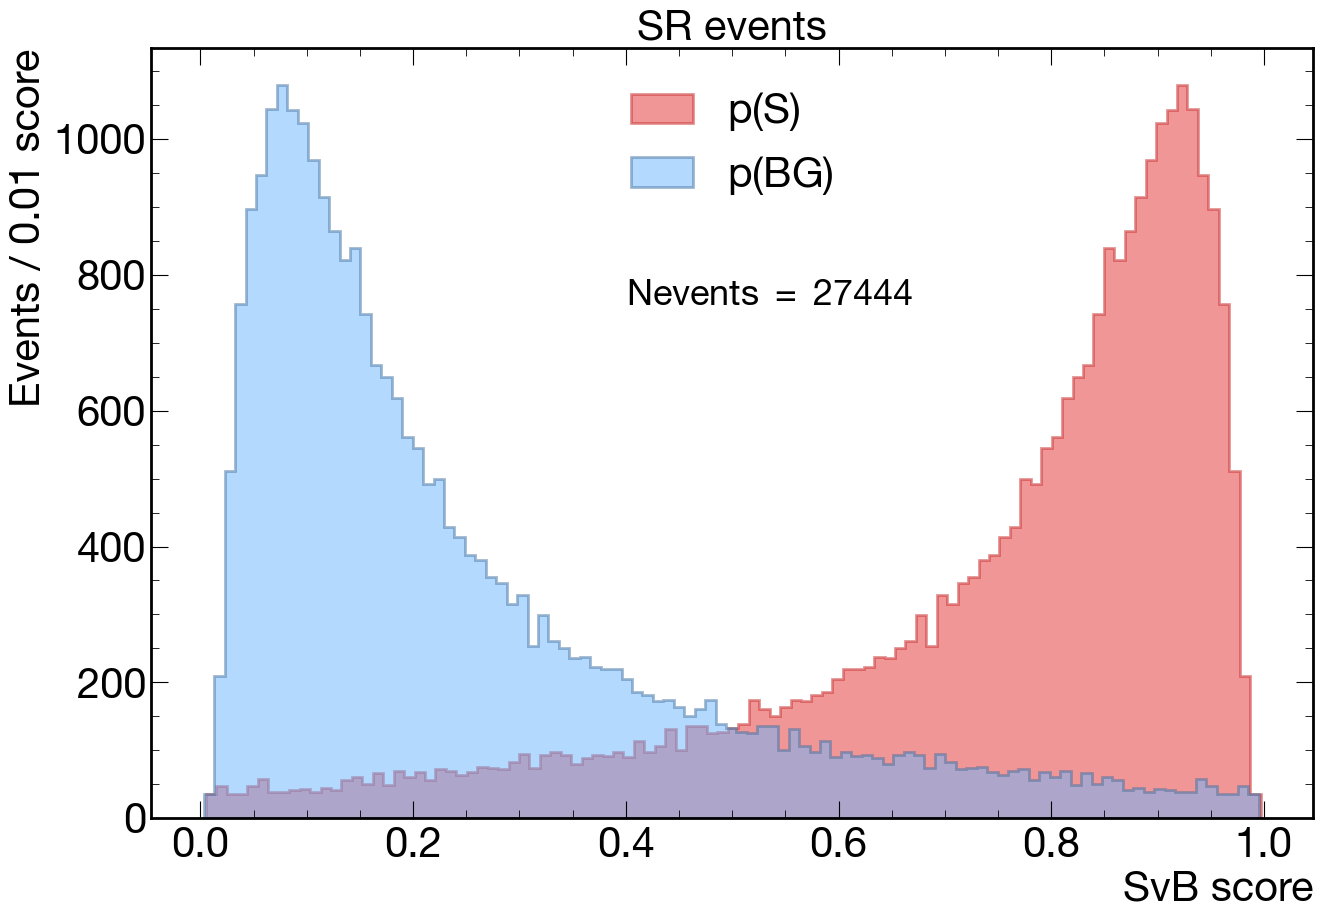

In [23]:
_min = 0.
_max = 1.
width = .01 # GeV
nbins = int(round((_max - _min) / width)) + 1


fig, ax = plt.subplots(figsize=(15, 10))
h, bins, _ = ax.hist(
    SR_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = reddish[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(S)$"
)
ax.hist(
    SR_background_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(BG)$"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("SvB score", fontsize = 30)
ax.set_ylabel("Events / %.2f score" % width, fontsize = 30)
ax.text((_max + _min) / 2 - .2 * (_max + _min) / 2, .70 * max(h), "Nevents $=$ %s" % len(SR_signal_score))
#ax.set_ylim(0, 5)
ax.legend(loc = "upper center", fontsize = 30)
ax.set_title("SR events", fontsize = 30)
plt.savefig("plots/threeTag_SvB_SR.pdf")

### SvB score in SB

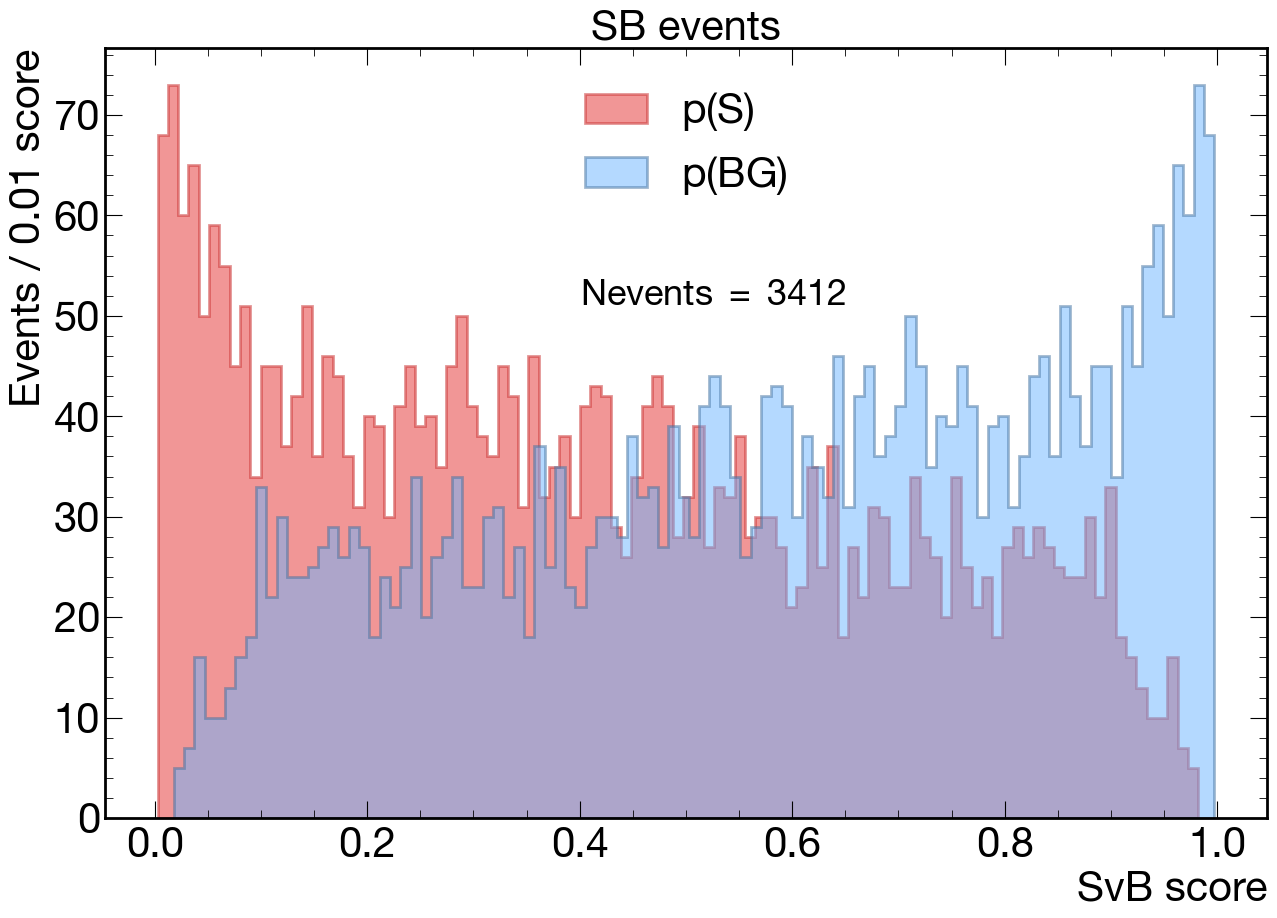

In [24]:
_min = 0.
_max = 1.
width = .01 # GeV
nbins = int(round((_max - _min) / width)) + 1


fig, ax = plt.subplots(figsize=(15, 10))
h, bins, _ = ax.hist(
    SB_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = reddish[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(S)$"
)
ax.hist(
    SB_background_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(BG)$"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("SvB score", fontsize = 30)
ax.set_ylabel("Events / %.2f score" % width, fontsize = 30)
ax.text((_max + _min) / 2 - .2 * (_max + _min) / 2, .70 * max(h), "Nevents $=$ %s" % len(SB_signal_score))
#ax.set_ylim(0, 5)
ax.legend(loc = "upper center", fontsize = 30)
ax.set_title("SB events", fontsize = 30)
plt.savefig("plots/SvB_SB.pdf")